In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score
from imblearn.combine import SMOTEENN
import math
import time
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/')
%cd 'drive/Shareddrives/CSCI 461/processed'
#%ls processed/*

Mounted at /content/drive/
/content/drive/Shareddrives/CSCI 461/processed


# Data Manipulation


In [ ]:
# Importing the data

data = pd.read_csv("combined_ohe_17.csv")

In [ ]:
# making education binary

edu_matrix = data[["highedcert_associate degree","highedcert_bachelor degree","highedcert_high school or ged",
                  "highedcert_higher degree","highedcert_none of the above","highedcert_vocational certificate",
                  "highedcert_vocational license"]]
data["edu_categorical"] = edu_matrix.idxmax(axis=1)

educationBinary = \
{   
    "highedcert_associate degree": 1,
    "highedcert_bachelor degree": 1,
    "highedcert_high school or ged": 1,
    "highedcert_higher degree": 1,
    "highedcert_none of the above":0,
    "highedcert_vocational certificate": 1,
    "highedcert_vocational license": 1
}
data['edu_binary'] = data["edu_categorical"].map(educationBinary) 

data.drop(columns=["recnumbr", "highedcert_associate degree","highedcert_bachelor degree","highedcert_high school or ged",
                  "highedcert_higher degree","highedcert_none of the above","highedcert_vocational certificate",
                  "highedcert_vocational license","edu_categorical", 'edu_binary','homeless_no','homeless_yes', 'subabuse_no', 'incarc_no', 'incarc_yes', 'edu_categorical', 'currfte_no',	'currfte_yes',	'currpte_no',	'currpte_yes'], axis=1, inplace=True)

target='subabuse_yes'

In [ ]:
# drop services (OPTIONAL)
# data.drop(columns=['specedsv_No',
#  'specedsv_Yes',
#  'ilnasv_No',
#  'ilnasv_Yes',
#  'acsuppsv_No',
#  'acsuppsv_Yes',
#  'psedsuppsv_No',
#  'psedsuppsv_Yes',
#  'careersv_No',
#  'careersv_Yes',
#  'emplytrsv_No',
#  'emplytrsv_Yes',
#  'budgetsv_No',
#  'budgetsv_Yes',
#  'housedsv_No',
#  'housedsv_Yes',
#  'hlthedsv_No',
#  'hlthedsv_Yes',
#  'famsuppsv_No',
#  'famsuppsv_Yes',
#  'mentorsv_No',
#  'mentorsv_Yes',
#  'silsv_No',
#  'silsv_Yes',
#  'rmbrdfasv_No',
#  'rmbrdfasv_Yes',
#  'educfinasv_No',
#  'educfinasv_Yes',
#  'othrfinasv_No',
#  'othrfinasv_Yes'], axis=1, inplace=True)

# Balancing Sample

In [ ]:
k=5
y = data.loc[:,target]
X = data.loc[:,data.columns != target]
X=X.reset_index(drop=True)
smote_enn = SMOTEENN(random_state=0)
X, y = smote_enn.fit_resample(X, y)

In [ ]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)
#data['target'] IS THE VARIABLE USED FOR STRATIFIED SAMPLING.
splits = kfold.split(X,y)
print(f'PROPORTION OF TARGET IN THE ORIGINAL DATA\n{y.value_counts() / len(y)}\n\n')
for n,(train_index,test_index) in enumerate(splits):
    print(f'SPLIT NO {n+1}\nTRAINING SET SIZE: {np.round(len(train_index) / (len(train_index)+len(test_index)),2)}'+
          f'\tTEST SET SIZE: {np.round(len(test_index) / (len(train_index)+len(test_index)),2)}\nPROPORTION OF TARGET IN THE TRAINING SET\n'+
          f'{y[test_index].value_counts() / len(y[test_index])}\nPROPORTION OF TARGET IN THE TEST SET\n'+
          f'{y[train_index].value_counts() / len(y[train_index])}\n\n')


PROPORTION OF TARGET IN THE ORIGINAL DATA
1    0.690395
0    0.309605
Name: subabuse_yes, dtype: float64


SPLIT NO 1
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.690346
0    0.309654
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.690408
0    0.309592
Name: subabuse_yes, dtype: float64


SPLIT NO 2
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.690303
0    0.309697
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.690419
0    0.309581
Name: subabuse_yes, dtype: float64


SPLIT NO 3
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.690443
0    0.309557
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.690384
0    0.309616
Name: subabuse_yes, dtype: float64


SPLIT NO 4
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.690443
0    0.3

In [ ]:
# MAKING DATA OMLY SELECTED FEATURES (DOING AFTER SMOTE/ BALANCING)

X = X.drop(columns=['st_AK','st_AL','st_AR','st_AZ','st_CA','st_CO','st_CT', 
                                  'st_DC', 'st_DE', 'st_FL', 'st_IN', 'st_HI', 'st_IA',
                                  'st_ID','st_IL','st_KS','st_KY', 'st_LA', 'st_MD', 'st_ME', 'st_MI', 'st_MN', 'st_MO',
                                  'st_MS', 'st_MT', 'st_NC', 'st_ND', 'st_NE', 'st_NH', 'st_NJ', 'st_NM', 'st_NV', 'st_NY', 'st_OH',
                                  'st_OK', 'st_OR', 'st_PA', 'st_PR', 'st_RI', 'st_SC', 'st_SD', 'st_TN', 'st_UT', 'st_VA', 'st_VT',
                                  'st_WA', 'st_WI', 'st_WV', 'st_WY','outcmfcs_yes', 'amiakn_yes', 'asian_no', 'asian_yes',
                                  'hawaiipi_no', 'hawaiipi_yes','raceunkn_no','raceunkn_yes', 'educaid_no', 'pubfinas_no',
                                  'pubfinas_not applicable','pubfoodas_no', 'pubfoodas_not applicable', 'children_yes',
                                  'marriage_no', 'marriage_yes', 'medicaid_do not know', 'othrhlthin_not applicable', 
                                  'othrhlthin_yes', 'medicalin_no', 'medicalin_yes', 'medicalin_do not know', 'mentlhlthin_do not know',
                                  'mentlhlthin_no', 'mentlhlthin_not applicable', 'mentlhlthin_yes', 'prescripin_no',
                                  'prescripin_not applicable', 'prescripin_do not know', 'prescripin_yes', 'baseline_yes'], axis=1)

In [ ]:
# data with no service columns
data_ns = data.drop(columns=['specedsv_No','specedsv_Yes','ilnasv_No',
 'ilnasv_Yes','acsuppsv_No','acsuppsv_Yes','psedsuppsv_No',
 'psedsuppsv_Yes','careersv_No','careersv_Yes','emplytrsv_No',
 'emplytrsv_Yes','budgetsv_No','budgetsv_Yes','housedsv_No',
 'housedsv_Yes','hlthedsv_No','hlthedsv_Yes','famsuppsv_No',
 'famsuppsv_Yes','mentorsv_No','mentorsv_Yes','silsv_No','silsv_Yes',
 'rmbrdfasv_No','rmbrdfasv_Yes','educfinasv_No','educfinasv_Yes',
 'othrfinasv_No','othrfinasv_Yes'], axis=1)

# X with no service columns
X_ns = X.drop(columns=['specedsv_No','specedsv_Yes','ilnasv_No',
 'ilnasv_Yes','acsuppsv_No','acsuppsv_Yes','psedsuppsv_No',
 'psedsuppsv_Yes','careersv_No','careersv_Yes','emplytrsv_No',
 'emplytrsv_Yes','budgetsv_No','budgetsv_Yes','housedsv_No',
 'housedsv_Yes','hlthedsv_No','hlthedsv_Yes','famsuppsv_No',
 'famsuppsv_Yes','mentorsv_No','mentorsv_Yes','silsv_No','silsv_Yes',
 'rmbrdfasv_No','rmbrdfasv_Yes','educfinasv_No','educfinasv_Yes',
 'othrfinasv_No','othrfinasv_Yes'], axis=1)

In [ ]:
import regex as re

#X_yes = X[X.columns.drop(list(X.filter(regex='_no'))])
X_yes = X.filter(regex=("(?i)yes*")) # keeps yes (case insesitive)              
X_yes["female_yes"] = X["sex_female"]

<ipython-input-12-66a392ffdd1c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_yes["female_yes"] = X["sex_female"]


In [ ]:
# optional, makes the baseline (no/ did not respond) --> coefficient indicates effect of saying "yes" 
myX = X_yes
#myX = X

# Analysis Prep

In [ ]:
# just to copy paste all the features for feature cat

#for i in data.columns: 
  #print('"'+i+'":')

In [ ]:
# categorizing features

"""
state: the feature is a state

demographic: Something about the individual that can't be changed (e.g. race)

service: Serices provided that aren't specific to foster youth (e.g. school 
  enrollment status, financial aid, employment skills). Mayve service isn't the
  right word, but I mean stuff that can be changed (e.g. connection to adult,
  say it's most important, now we can advise a mentorship program)
  
foster service: Service provided specifically kids in the foster care system
target: other variables that indicate outcome (e.g. educational attainment)
"""
CATEGORIES = ['state', 'demographic', 'service', 'foster service', 'target']

# "#" = UNSURE ABOUT CAT

feature_cat = {
    "age": "demographic",
  "st_AK": "state",
  "st_AL": "state",
  "st_AR": "state",
  "st_AZ": "state",
  "st_CA": "state",
  "st_CO": "state",
  "st_CT": "state",
  "st_DC": "state",
  "st_DE": "state",
  "st_FL": "state",
  "st_GA": "state",
  "st_HI": "state",
  "st_IA": "state",
  "st_ID": "state",
  "st_IL": "state",
  "st_IN": "state",
  "st_KS": "state",
  "st_KY": "state",
  "st_LA": "state",
  "st_MA": "state",
  "st_MD": "state",
  "st_ME": "state",
  "st_MI": "state",
  "st_MN": "state",
  "st_MO": "state",
  "st_MS": "state",
  "st_MT": "state",
  "st_NC": "state",
  "st_ND": "state",
  "st_NE": "state",
  "st_NH": "state",
  "st_NJ": "state",
  "st_NM": "state",
  "st_NV": "state",
  "st_NY": "state",
  "st_OH": "state",
  "st_OK": "state",
  "st_OR": "state",
  "st_PA": "state",
  "st_PR": "state",
  "st_RI": "state",
  "st_SC": "state",
  "st_SD": "state",
  "st_TN": "state",
  "st_TX": "state",
  "st_UT": "state",
  "st_VA": "state",
  "st_VT": "state",
  "st_WA": "state",
  "st_WI": "state",
  "st_WV": "state",
  "st_WY": "state",

  "sex_male": "demographic",
  "sex_female": "demographic",

  "outcmfcs_no": "target",
  "outcmfcs_yes": "target",

  "amiakn_no": "demographic",
  "amiakn_yes": "demographic",
  "asian_no": "demographic",
  "asian_yes": "demographic",
  "blkafram_no": "demographic",
  "blkafram_yes": "demographic",
  "hawaiipi_no": "demographic",
  "hawaiipi_yes": "demographic",
  "white_no": "demographic",
  "white_yes": "demographic",
  "raceunkn_no": "demographic",
  "raceunkn_yes": "demographic",
  "hisorgin_no": "demographic",
  "hisorgin_yes": "demographic",
  "female_yes": "demographic",

  "emplysklls_no": "service",
  "emplysklls_yes": "service",
  "educaid_no": "service",
  "educaid_yes": "service",
  "pubfinas_no": "service",
  "pubfinas_not applicable": "service",
  "pubfinas_yes": "service",
  "pubfoodas_no": "service",
  "pubfoodas_yes": "service",
  "pubfoodas_not applicable": "service",
  "othrfinas_no": "service",
  "othrfinas_yes": "service",
  "currenroll_no": "service",
  "currenroll_yes": "service",
  "cnctadult_no": "service", #
  "cnctadult_yes": "service", #
  "children_no": "service", #
  "children_yes": "service", #
  "marriage_no":  "service", #
  "marriage_not applicable":  "service", #
  "marriage_yes": "service", #
  "medicaid_do not know": "service",
  "medicaid_no": "service",
  "medicaid_yes": "service",
  "othrhlthin_do not know": "service",
  "othrhlthin_no": "service",
  "othrhlthin_not applicable": "service",
  "othrhlthin_yes": "service",
  "medicalin_no": "service",
  "medicalin_yes": "service",
  "medicalin_do not know": "service",
  "medicalin_not applicable": "service",
  "mentlhlthin_no": "service",
  "mentlhlthin_yes": "service",
  "mentlhlthin_do not know": "service",
  "mentlhlthin_not applicable": "service",
  "prescripin_no": "service",
  "prescripin_yes": "service",
  "prescripin_do not know": "service",
  "prescripin_not applicable": "service",
  "baseline_yes": "service", #

  "specedsv_No": "foster service",
  "specedsv_Yes": "foster service",
  "ilnasv_No": "foster service",
  "ilnasv_Yes": "foster service",
  "acsuppsv_No": "foster service",
  "acsuppsv_Yes": "foster service",
  "psedsuppsv_No": "foster service",
  "psedsuppsv_Yes": "foster service",
  "careersv_No": "foster service",
  "careersv_Yes": "foster service",
  "emplytrsv_No": "foster service",
  "emplytrsv_Yes": "foster service",
  "budgetsv_No": "foster service",
  "budgetsv_Yes": "foster service",
  "housedsv_No": "foster service",
  "housedsv_Yes": "foster service",
  "hlthedsv_No": "foster service",
  "hlthedsv_Yes": "foster service",
  "famsuppsv_No": "foster service",
  "famsuppsv_Yes": "foster service",
  "mentorsv_No": "foster service",
  "mentorsv_Yes": "foster service",
  "silsv_No": "foster service",
  "silsv_Yes": "foster service",
  "rmbrdfasv_No": "foster service",
  "rmbrdfasv_Yes": "foster service",
  "educfinasv_No": "foster service",
  "educfinasv_Yes": "foster service",
  "othrfinasv_No": "foster service",
  "othrfinasv_Yes": "foster service",
  "subabuse_yes": "foster service",
} 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def my_cm_dec(y,y_pred):
  cm = confusion_matrix(y,y_pred)
  n=sum(cm.ravel()[:2])
  p=sum(cm.ravel()[2:])
  cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
  cm_matrix = cm_matrix.loc[ ['Actual Positive:1','Actual Negative:0'], [ 'Predict Positive:1', 'Predict Negative:0']]
  cm_matrix.loc['Actual Positive:1', :] = cm_matrix.loc['Actual Positive:1', :] /p
  cm_matrix.loc['Actual Negative:0', :]  = cm_matrix.loc['Actual Negative:0', :] /n
  sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu')
  plt.show()

  cf_matrix = confusion_matrix(y, y_pred)
  tp = cf_matrix[1][1]
  tn = cf_matrix[0][0]
  fp = cf_matrix[0][1]
  fn = cf_matrix[1][0]

  print("False Positive rate: ", round(fp/(fp+tn),2), " Out of all wrong preds, what % was positive?")
  print("False Negative rate: ", round(fn/(fn+tp),2), " Out of all wrong preds, what % was negative?")
  print("Specificity: ", round(tn/(tn+fp),2), " Out of all ppl who didn't recieve referals, what % was correct?")
  print("Sensitivity: ", round(tp/(tp+fn),2)," Out of all ppl who did receive referals, what % was correct?")

  return cm.ravel()

def my_scores(mod, X, y,k=5):
  scoring = ['accuracy', 'precision', 'f1', 'recall', 'roc_auc']
  scores = cross_validate(mod, X, y, cv=k,scoring=scoring)
  print("accuracy:",sum(scores["test_accuracy"])/k)
  print("precision:",sum(scores["test_precision"])/k)
  print("auc:",sum(scores["test_roc_auc"])/k)
  print("recall:",sum(scores["test_recall"])/k)
  print("f1:",sum(scores["test_f1"])/k)
  results = [sum(scores["test_accuracy"])/k,
             sum(scores["test_precision"])/k,
             sum(scores["test_roc_auc"])/k,
             sum(scores["test_recall"])/k,
             sum(scores["test_f1"])/k
             ]
  return results

def stdev(test_list):
  mean = sum(test_list) / len(test_list)
  return (sum([((x - mean) ** 2) for x in test_list]) / len(test_list)) ** 0.5

In [ ]:
# prepare results
def get_sort_res(mydf, coef):
  #mydf = mydf2.copy()
  mydf["coef"] = coef
  mydf["abs coef"] = abs(mydf["coef"])
  mydf.sort_values(by="abs coef",inplace=True, ascending = False)
  mydf = mydf.reset_index(drop=True)
  mydf["rank"] = mydf.index
  mydf["cat"] = mydf.apply(lambda row: feature_cat[row.feature], axis=1)
  return mydf

# get features ordered without state 
def get_ns(mydf):
  lin_svc1 = mydf.copy()
  discard = ["st_"]
  #lin_svc1[~lin_svc.feature.str.contains('|'.join(discard))]
  return lin_svc1[~lin_svc.feature.str.contains('|'.join(discard))]

In [ ]:
# df.head()

In [ ]:
# plot results by category
import plotly.graph_objects as go

def plot_bycat(df):
  for i in df["cat"].unique():
    print("***** CATEGORY: ", i, " *****")
    # test = lin_svc_ns[lin_svc_ns.cat == "foster service"]
    test = df[df.cat == i]
    fig, ax = plt.subplots()
    if i == 'foster service':
      test = test[test.feature in []]
      sns.barplot(x=test["coef"],y=test["feature"])
    else:
      sns.barplot(x=test["coef"],y=test["feature"])
    plt.grid()
    plt.show()

    fig = go.Figure(layout_title_text=f"Feature Importance")
    fig.add_trace(go.Scatterpolar(    # RFC
          # r=list(rfc_imp_by_feat.values()),
          r=test["coef"],
          theta=test["feature"],
          # fill='none',
          name=i,
          # connectgaps=True
    ))    
    fig.update_layout(
    polar=dict( 
        radialaxis=dict(
          visible=True,
          range=[0, .1]
        )),
      showlegend=True
    )

    fig.show()
  return

def plot_all(df):
  test = df
  fig, ax = plt.subplots()
  sns.barplot(x=test["coef"],y=test["feature"])
  plt.grid()
  plt.show()
  return

## SVM

In [ ]:
svm_df = pd.DataFrame(index = myX.columns, columns = ["services","no services","change"])

SVM: with services

In [ ]:
from sklearn.svm import LinearSVC

lin_svc = pd.DataFrame(columns=["feature","coef"])
lin_svc["feature"] = myX.columns

model = LinearSVC()
model.fit(myX, y)

my_coeff = model.coef_[0,:]
svm_df["services"] = my_coeff

lin_svc = get_sort_res(lin_svc, my_coeff)
lin_svc_ns = get_ns(lin_svc) # getting rid of state for display

display(lin_svc_ns)

,feature,coef,abs coef,rank,cat
0,educaid_yes,-0.669040,0.669040,0,service
1,blkafram_yes,-0.495849,0.495849,1,demographic
2,hisorgin_yes,-0.319989,0.319989,2,demographic
3,specedsv_Yes,-0.275967,0.275967,3,foster service
4,pubfoodas_yes,-0.265016,0.265016,4,service
5,othrfinas_yes,-0.252200,0.252200,5,service
6,female_yes,-0.250997,0.250997,6,demographic
7,pubfinas_yes,-0.203079,0.203079,7,service
8,acsuppsv_Yes,0.160811,0.160811,8,foster service
9,budgetsv_Yes,-0.153858,0.153858,9,foster service


***** CATEGORY:  service  *****


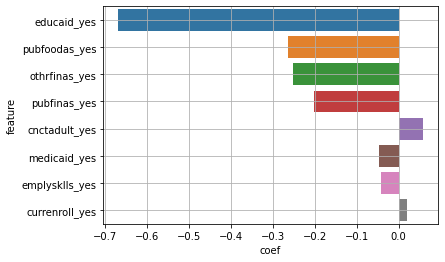

***** CATEGORY:  demographic  *****


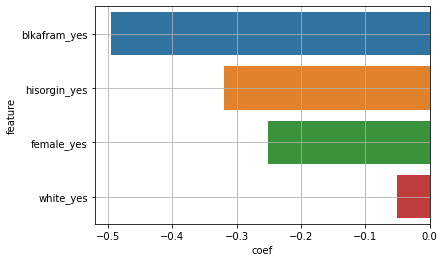

***** CATEGORY:  foster service  *****


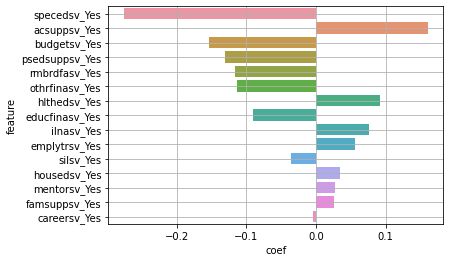

In [ ]:
plot_bycat(lin_svc_ns)

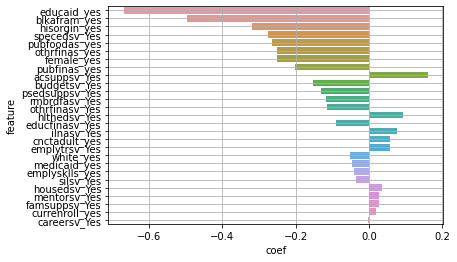

In [ ]:
plot_all(lin_svc_ns)

No foster services

In [ ]:
#myX = X_ns

myX_ns = X_ns.filter(regex=("(?i)yes*")) # keeps yes (case insesitive)              
myX_ns["female_yes"] = X_ns["sex_female"]

lin_svc = pd.DataFrame(columns=["feature","coef"])
lin_svc["feature"] = myX_ns.columns

model = LinearSVC()
model.fit(myX_ns, y)

my_coeff = model.coef_[0,:]

lin_svc = get_sort_res(lin_svc, my_coeff)
lin_svc_ns = get_ns(lin_svc) # getting rid of state for display

display(lin_svc_ns)

<ipython-input-54-853b08deca58>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,feature,coef,abs coef,rank,cat
0,educaid_yes,-0.692953,0.692953,0,service
1,blkafram_yes,-0.514109,0.514109,1,demographic
2,hisorgin_yes,-0.336891,0.336891,2,demographic
3,pubfoodas_yes,-0.281270,0.281270,3,service
4,othrfinas_yes,-0.276650,0.276650,4,service
5,female_yes,-0.238993,0.238993,5,demographic
6,pubfinas_yes,-0.186173,0.186173,6,service
7,white_yes,-0.066275,0.066275,7,demographic
8,cnctadult_yes,0.061161,0.061161,8,service
9,medicaid_yes,-0.050683,0.050683,9,service


***** CATEGORY:  service  *****


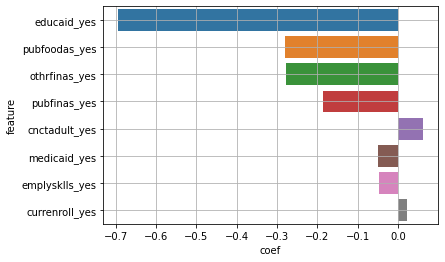

***** CATEGORY:  demographic  *****


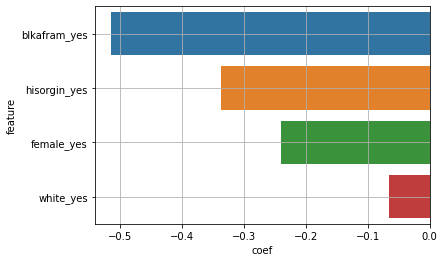

In [ ]:
plot_bycat(lin_svc_ns)

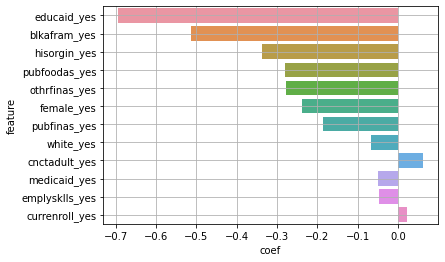

In [ ]:
plot_all(lin_svc_ns)

In [ ]:
lin_svc_ns.set_index("feature", inplace=True)

In [ ]:
for i in myX_ns.columns: # features without foster services
  if i in myX.columns: # every feature
    svm_df["no services"].loc[i] = lin_svc_ns["coef"].loc[i]
  else:
    svm_df["no services"].loc[i] = np.nan

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
svm_df

,services,no services,change
blkafram_yes,-0.495849,-0.514109,NaN
white_yes,-0.050741,-0.066275,NaN
hisorgin_yes,-0.319989,-0.336891,NaN
emplysklls_yes,-0.041810,-0.046658,NaN
educaid_yes,-0.669040,-0.692953,NaN
pubfinas_yes,-0.203079,-0.186173,NaN
pubfoodas_yes,-0.265016,-0.28127,NaN
othrfinas_yes,-0.252200,-0.27665,NaN
currenroll_yes,0.019244,0.022186,NaN
cnctadult_yes,0.057699,0.061161,NaN


Services vs No services

In [ ]:
svm_df["change"] = svm_df["services"] - svm_df["no services"]
svm_df["abs change"] = abs(svm_df["change"])
svm_df.sort_values(by="abs change",inplace=True, ascending = False)

In [ ]:
svm_df

,services,no services,change,abs change
othrfinas_yes,-0.252200,-0.27665,0.02445,0.02445
educaid_yes,-0.669040,-0.692953,0.023914,0.023914
blkafram_yes,-0.495849,-0.514109,0.01826,0.01826
pubfinas_yes,-0.203079,-0.186173,-0.016905,0.016905
hisorgin_yes,-0.319989,-0.336891,0.016902,0.016902
pubfoodas_yes,-0.265016,-0.28127,0.016254,0.016254
white_yes,-0.050741,-0.066275,0.015534,0.015534
female_yes,-0.250997,-0.238993,-0.012005,0.012005
emplysklls_yes,-0.041810,-0.046658,0.004848,0.004848
cnctadult_yes,0.057699,0.061161,-0.003462,0.003462


***** CATEGORY:  service  *****


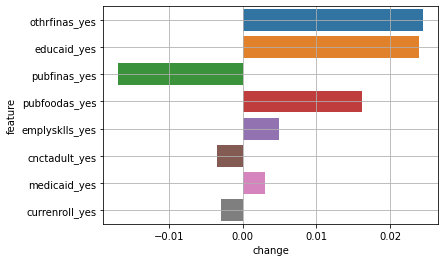

***** CATEGORY:  demographic  *****


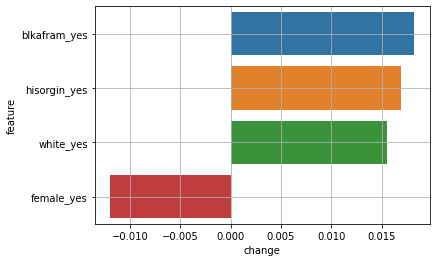

***** CATEGORY:  foster service  *****


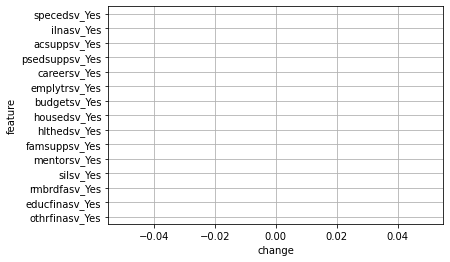

In [ ]:
svm_df["feature"] = svm_df.index
svm_df["cat"] = svm_df.apply(lambda row: feature_cat[row.feature], axis=1)

for i in svm_df["cat"].unique():
  print("***** CATEGORY: ", i, " *****")
  test = svm_df[svm_df.cat == i]
  fig, ax = plt.subplots()
  sns.barplot(x=test["change"],y=test["feature"])
  plt.grid()
  plt.show()

# what happens when you go from no services to services! (aka, positive value indicates increase in importance of that feature when you add services)
# e.g. children is negative, so if the individual has a child decreases in importance when you add services
  # what does this say about service usage? Stuff that used to be explained by having children is now explained by service usage..? Interaction term would be useful! 
  # ... run SVM interacting all remaining features with every service.. see what the most relevant interaction terms are! Who benefits the most from using X service?
  # since data set isn't balanced for service usage, maybe interaction terms would be biased due to small sample size of people with X feature just not having access to that service

# Permutation Feature Importance on SVM

In [ ]:
myX_ns.columns

Index(['blkafram_yes', 'white_yes', 'hisorgin_yes', 'emplysklls_yes',
       'educaid_yes', 'pubfinas_yes', 'pubfoodas_yes', 'othrfinas_yes',
       'currenroll_yes', 'cnctadult_yes', 'medicaid_yes', 'female_yes'],
      dtype='object')

In [ ]:
myX_ns.iloc[test_index, :].columns

Index(['blkafram_yes', 'white_yes', 'hisorgin_yes', 'emplysklls_yes',
       'educaid_yes', 'pubfinas_yes', 'pubfoodas_yes', 'othrfinas_yes',
       'currenroll_yes', 'cnctadult_yes', 'medicaid_yes', 'female_yes'],
      dtype='object')

In [ ]:
from sklearn.inspection import permutation_importance # 1002
# pred = model.predict()
splits = kfold.split(X, y)
# imp_by_feat = {key: [0.0,0.0] for key in CATEGORIES}    # keys: categories, values: [running total of permutation importance, count]
imp_by_feat = {}
for n,(train_index, test_index) in enumerate(splits):   # each of k training/test sets
  r = permutation_importance(model, myX_ns.iloc[test_index, :], y.iloc[test_index],
                              n_repeats=30,     # can change this
                              random_state=0)
  # model.fit(X.iloc[train_index, :-1], y.iloc[train_index])
  # pred = model.predict(X.iloc[test_index, :-1])
  # for i in y[test_index]: y_truth.append(i)
  # for i in pred: y_pred.append(i)


  for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
      feat = lin_svc.feature[i]
      cat = feature_cat[feat]
      imp = r.importances_mean[i]
      imp_by_feat[feat] = imp
      print(f"{feat:<8}\t"
            f"{cat:<8}\t"
            f"{imp:.3f}\t"
            f" +/- {r.importances_std[i]:.3f}")

# radar_input = {key: imp_by_feat[key][0]/imp_by_cat[key][1] if imp_by_cat[key][1] > 0 else 0 for key in imp_by_cat.keys()}    # keys: categories, values: mean importance in that category


educaid_yes	service 	0.055	 +/- 0.004
othrfinas_yes	service 	0.013	 +/- 0.001
hisorgin_yes	demographic	0.011	 +/- 0.003
currenroll_yes	service 	0.006	 +/- 0.002
white_yes	demographic	0.005	 +/- 0.002
pubfoodas_yes	service 	0.003	 +/- 0.001
educaid_yes	service 	0.056	 +/- 0.004
othrfinas_yes	service 	0.014	 +/- 0.001
hisorgin_yes	demographic	0.010	 +/- 0.002
white_yes	demographic	0.004	 +/- 0.001
female_yes	demographic	0.001	 +/- 0.000
pubfinas_yes	service 	0.001	 +/- 0.001
educaid_yes	service 	0.056	 +/- 0.003
othrfinas_yes	service 	0.017	 +/- 0.002
hisorgin_yes	demographic	0.009	 +/- 0.002
currenroll_yes	service 	0.007	 +/- 0.002
white_yes	demographic	0.004	 +/- 0.001
educaid_yes	service 	0.057	 +/- 0.004
othrfinas_yes	service 	0.016	 +/- 0.002
currenroll_yes	service 	0.011	 +/- 0.002
hisorgin_yes	demographic	0.010	 +/- 0.002
pubfoodas_yes	service 	0.005	 +/- 0.001
white_yes	demographic	0.004	 +/- 0.002
educaid_yes	service 	0.059	 +/- 0.004
othrfinas_yes	service 	0.014	 +/- 0.001
hiso

In [ ]:
import plotly.graph_objects as go
max_val = np.amax(list(imp_by_feat.values()))
fig = go.Figure(layout_title_text="SVM Feature Importance")
fig.add_trace(go.Scatterpolar(
      r=list(imp_by_feat.values()),
      theta=list(imp_by_feat.keys()),
      fill='toself',
      name='SVM'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, max_val]
    )),
  showlegend=False
)

fig.show()


## LIME

In [ ]:
"""

from sklearn.ensemble import RandomForestClassifier

# instantiate classifier with default hyperparameters
rfc=RandomForestClassifier() 

# make predictions on test set
model=RandomForestClassifier(n_estimators = 100)
y_pred = cross_val_predict(rfc, X, y, cv=k)
my_cm_dec(y, y_pred) 

"""



'\n\nfrom sklearn.ensemble import RandomForestClassifier\n\n# instantiate classifier with default hyperparameters\nrfc=RandomForestClassifier() \n\n# make predictions on test set\nmodel=RandomForestClassifier(n_estimators = 100)\ny_pred = cross_val_predict(rfc, X, y, cv=k)\nmy_cm_dec(y, y_pred) \n\n'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators = 100) 
y_truth=[]
y_pred=[]
splits = kfold.split(X, y)
for n,(train_index, test_index) in enumerate(splits):
  model.fit(X.iloc[train_index, :-1], y.iloc[train_index])
  pred = model.predict(X.iloc[test_index, :-1])
  for i in y[test_index]: y_truth.append(i)
  for i in pred: y_pred.append(i)

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X.iloc[train_index, :-1]),
    feature_names= X.iloc[train_index].columns,
    class_names=['no referral', 'referral'],
    mode='classification'
)

In [ ]:
#X.iloc[test_index, :-1]

In [ ]:
data=X.iloc[test_index, :-1]
exp = explainer.explain_instance(
    data_row = data.iloc[1],
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
# next: figure out how to not show states in LIME show_in_notebook even though they are in the model

# next next: Viz decision tree? (https://mljar.com/blog/visualize-decision-tree/)